POLICE DATA SET 

In [1]:
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import requests # Library for website scraping

!pip install BeautifulSoup4
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans # import k-means from clustering stage

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crime_keep_columns = ['event_unique_id',
                      'occurrencedate',
                      'offence', 
                      'occurrencemonth',
                      'occurrenceyear',
                      'occurrenceday',
                      'occurrencedayofweek',
                      'occurrencehour',
                      'Hood_ID',
                      'Neighbourhood',
                      'Lat',
                      'Long']

In [3]:
policedata= pd.read_csv("POLICEDATA.csv",
                 usecols=crime_keep_columns)

policedata.head()

event_unique_id          occurrencedate             offence  occurrenceyear  \
0  GO-20141756319  2014/03/24 00:00:00+00             Assault          2014.0   
1  GO-20143006885  2014/09/27 00:00:00+00                 B&E          2014.0   
2  GO-20141756802  2014/03/24 00:00:00+00                 B&E          2014.0   
3  GO-20141760570  2014/03/24 00:00:00+00                 B&E          2014.0   
4  GO-20142004859  2014/05/03 00:00:00+00  Robbery - Business          2014.0   

  occurrencemonth  occurrenceday occurrencedayofweek  occurrencehour  Hood_ID  \
0           March           24.0          Monday                 1.0    132.0   
1       September           27.0          Saturday              16.0     76.0   
2           March           24.0          Monday                 6.0      1.0   
3           March           24.0          Monday                15.0     47.0   
4             May            3.0          Saturday               2.0     90.0   

                Neighbourhood       Long        Lat  
0               Malvern (132) -79.199081  43.800281  
1    Bay Street Corridor (76) -79.386383  43.662472  
2  West Humber-Clairville (1) -79.612595  43.720406  
3     Don Valley Village (47) -79.349121  43.782772  
4          Junction Area (90) -79.458778  43.664490

In [4]:
policedata.shape

(43680, 12)

In [5]:
policedata.rename(columns={'event_unique_id':'CASE#',
                          'occurrencedate':'DATE_OF_OCCURRENCE',
                          'offence':'TYPE_OF_OFFENCE',
                          'occurrenceyear':'YEAR',
                          'occurrencemonth':'MONTH',
                          'occurrenceday': 'DAY',
                          'occurrencedayofweek': 'WEEK',
                          'occurrencehour':'HOUR',
                          'Hood_ID': 'HOOD_ID',
                          'Neighbourhood':'NEIGHBORHOOD',
                          'Long':'LONGITUDE',
                          'Lat': 'LATITUDE'}, 
                 inplace=True)
policedata.head()

CASE#      DATE_OF_OCCURRENCE     TYPE_OF_OFFENCE    YEAR  \
0  GO-20141756319  2014/03/24 00:00:00+00             Assault  2014.0   
1  GO-20143006885  2014/09/27 00:00:00+00                 B&E  2014.0   
2  GO-20141756802  2014/03/24 00:00:00+00                 B&E  2014.0   
3  GO-20141760570  2014/03/24 00:00:00+00                 B&E  2014.0   
4  GO-20142004859  2014/05/03 00:00:00+00  Robbery - Business  2014.0   

       MONTH   DAY        WEEK  HOUR  HOOD_ID                NEIGHBORHOOD  \
0      March  24.0  Monday       1.0    132.0               Malvern (132)   
1  September  27.0  Saturday    16.0     76.0    Bay Street Corridor (76)   
2      March  24.0  Monday       6.0      1.0  West Humber-Clairville (1)   
3      March  24.0  Monday      15.0     47.0     Don Valley Village (47)   
4        May   3.0  Saturday     2.0     90.0          Junction Area (90)   

   LONGITUDE   LATITUDE  
0 -79.199081  43.800281  
1 -79.386383  43.662472  
2 -79.612595  43.720406  
3 -79.349121  43.782772  
4 -79.458778  43.664490

In [6]:
policedata.dtypes

CASE#                  object
DATE_OF_OCCURRENCE     object
TYPE_OF_OFFENCE        object
YEAR                  float64
MONTH                  object
DAY                   float64
WEEK                   object
HOUR                  float64
HOOD_ID               float64
NEIGHBORHOOD           object
LONGITUDE             float64
LATITUDE              float64
dtype: object

In [7]:
# Drop rows with missing values 
policedata.dropna(inplace=True)

In [8]:
# Reindex
policedata.reset_index(inplace=True)

In [9]:
policedata.sort_values(by=['MONTH'], inplace=True)

In [10]:
policedata.head()

index          CASE#      DATE_OF_OCCURRENCE      TYPE_OF_OFFENCE  \
7524    7532  GO-2015669082  2015/04/23 00:00:00+00              Assault   
20640  20657  GO-2015688481  2015/04/26 00:00:00+00  Assault Bodily Harm   
20639  20656  GO-2015688481  2015/04/26 00:00:00+00  Assault With Weapon   
20638  20655  GO-2015684519  2015/04/25 00:00:00+00  Assault With Weapon   
20637  20654  GO-2015681469  2015/04/24 00:00:00+00         B&E W'Intent   

         YEAR  MONTH   DAY        WEEK  HOUR  HOOD_ID  \
7524   2015.0  April  23.0  Thursday     0.0     21.0   
20640  2015.0  April  26.0  Sunday       3.0    128.0   
20639  2015.0  April  26.0  Sunday       3.0    128.0   
20638  2015.0  April  25.0  Saturday    13.0     48.0   
20637  2015.0  April  24.0  Friday      18.0     51.0   

                             NEIGHBORHOOD  LONGITUDE   LATITUDE  
7524                   Humber Summit (21) -79.558060  43.760002  
20640  Agincourt South-Malvern West (128) -79.270493  43.787136  
20639  Agincourt South-Malvern West (128) -79.270493  43.787136  
20638              Hillcrest Village (48) -79.341316  43.815655  
20637                Willowdale East (51) -79.406570  43.756504

In [11]:
# Number of unique Crime categories bases on the Primary Description
policedata.TYPE_OF_OFFENCE.nunique()

43

In [12]:
# What Crimes are the 3 most commonly occuring ones 
policedata[['TYPE_OF_OFFENCE', 'CASE#']].groupby(
    ['TYPE_OF_OFFENCE'], as_index=False).count().sort_values(
    'CASE#', ascending=False).head(3)

TYPE_OF_OFFENCE  CASE#
5               Assault  18048
12                  B&E   8712
11  Assault With Weapon   4102

Text(0.0, 1.0, 'Top 3 Cases Per Month')

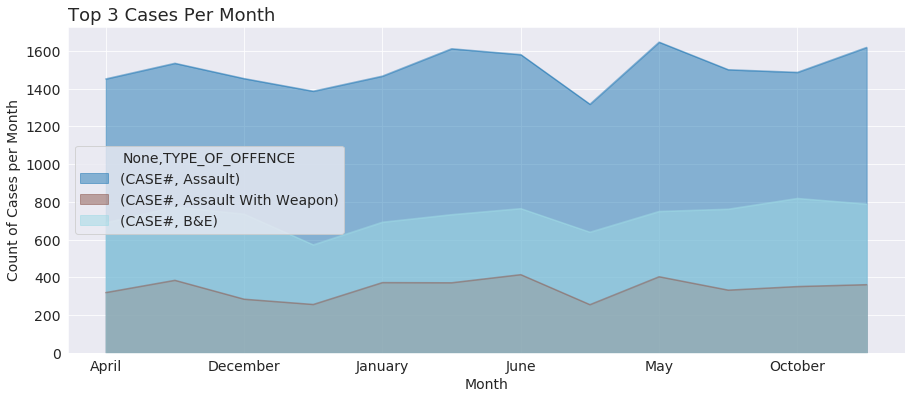

In [13]:
# Create a list of the 3 most commonly occuring crimes
top3crimes = policedata[['TYPE_OF_OFFENCE', 'CASE#']].groupby(
    ['TYPE_OF_OFFENCE']).count().sort_values('CASE#', ascending=False)[:3].axes[0].tolist()

# Create a new data frame with just the top 3 crimes
df_top3crimes = policedata[policedata['TYPE_OF_OFFENCE'].isin(top3crimes)].copy()

df_top3crimes.sort_values(by=['MONTH'], inplace=True)

# Create a pivot area chart of the crimes per month
df_top3crimes[['CASE#', 'TYPE_OF_OFFENCE', 'MONTH']].pivot_table(
    index='MONTH', 
    columns='TYPE_OF_OFFENCE', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=False,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases per Month')
plt.title('Top 3 Cases Per Month', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Top 3 Cases Per Day')

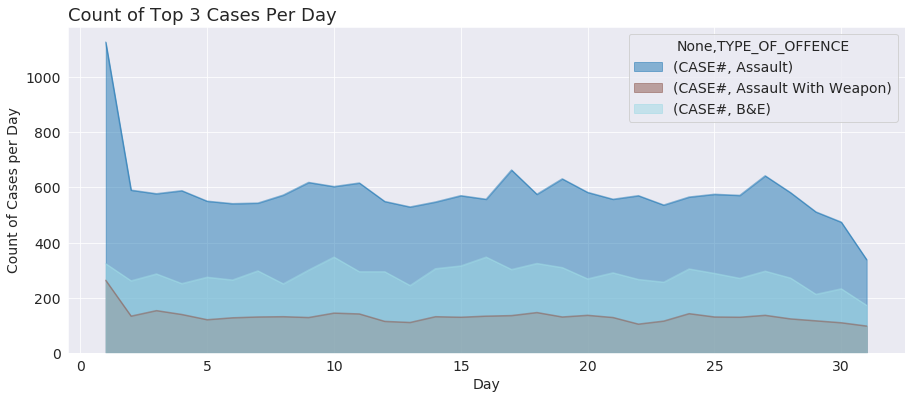

In [14]:
# Create a pivot area chart of the crimes per day
df_top3crimes[['CASE#', 'TYPE_OF_OFFENCE', 'DAY']].pivot_table(
    index='DAY', 
    columns='TYPE_OF_OFFENCE', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=False,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Top 3 Cases Per Day', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Top 3 Cases Per Hour')

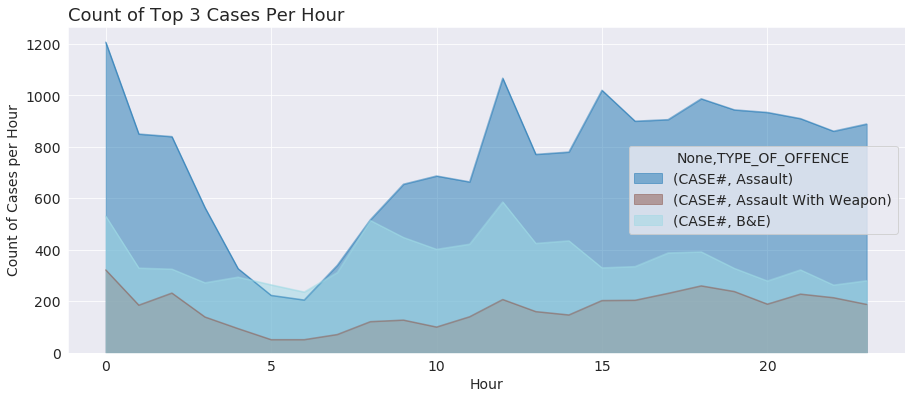

In [15]:
# Create a pivot area chart of the crimes per hour
df_top3crimes[['CASE#', 'TYPE_OF_OFFENCE', 'HOUR']].pivot_table(
    index='HOUR', 
    columns='TYPE_OF_OFFENCE', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=False,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Top 3 Cases Per Hour', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Month')

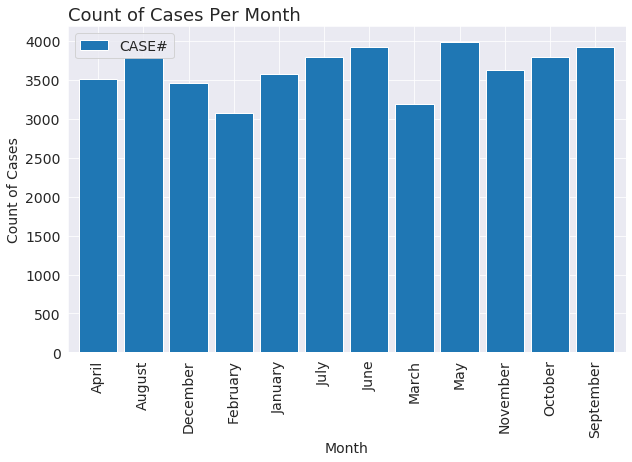

In [16]:
# Group the Crimes per month and produce a bar chart
policedata.groupby('MONTH').count().plot(y = 'CASE#', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Day')

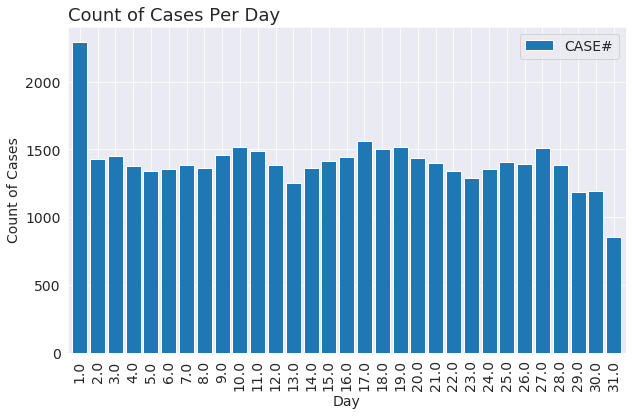

In [17]:
# Group the Crimes per day and produce a bar chart
policedata.groupby('DAY').count().plot(y = 'CASE#', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Day', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Cases Per Hour')

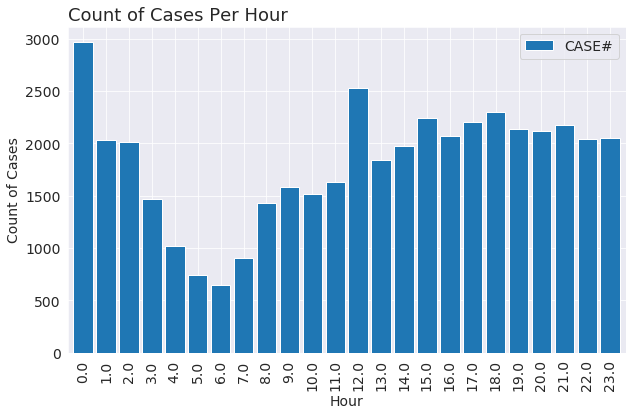

In [18]:
# Group the Crimes per month and produce a bar chart
policedata.groupby('HOUR').count().plot(y = 'CASE#', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Hour', loc='left', fontsize=18)

In [19]:
# Create a list of 3 colours. 
# We have  list of the top 3 crimes from earlier
colors3 = [
    'red',
    'blue',
    'green'
]

# Create a dictionary of colours to map to the crimes
dict_colours3 = dict(zip(top3crimes, colors3))

In [20]:
# Add the colours colums to the df_top_crimes DataFrame
df_top3crimes['colour'] = df_top3crimes.TYPE_OF_OFFENCE.map(dict_colours3)

# Filter the top 10 crimes dataframe to extract May only
df_top3crimes_may = df_top3crimes[df_top3crimes.MONTH == 'May']

In [21]:
# Define Toronto's geolocation coordinates
Toronto_latitude = 43.65 
Toronto_longitude = -79.38

In [22]:
# Define the world map centered around Toronto with a higher zoom level
Toronto_map = folium.Map(location=[Toronto_latitude, Toronto_longitude], zoom_start=11)

# display world map
Toronto_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the May crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top3crimes_may.LATITUDE, 
                         df_top3crimes_may.LONGITUDE, 
                         df_top3crimes_may.colour):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
Toronto_map.add_child(incidents)

In [23]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
Toronto_cluster = folium.Map(location=[Toronto_latitude, Toronto_longitude], zoom_start=11)

# display world map
Toronto_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top3crimes_may.itertuples():
    mc.add_child(folium.Marker(
        location=[row.LATITUDE,  row.LONGITUDE],
                 popup=row.TYPE_OF_OFFENCE))
 
Toronto_cluster.add_child(mc)
Toronto_cluster

In [24]:
from folium import plugins
from folium.plugins import HeatMap

Toronto_heatmap = folium.Map(location=[Toronto_latitude, Toronto_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['LATITUDE'], 
              row['LONGITUDE']] for index, row in df_top3crimes_may.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(Toronto_heatmap)

# Display the map
Toronto_heatmap

LET'S MARK THE PURPLE PENGUIN CAFE IN THIS MAP TO SEE IF IT IS AROUND THE TOP 3 CRIME AREA

In [27]:
PP_latitude= 43.660501
PP_longitude =-79.342565

In [28]:
PP_Map = folium.Map(location=[Toronto_latitude, Toronto_longitude], zoom_start=15) 

# add PP as a red circle mark
folium.features.CircleMarker(
    [PP_latitude, PP_longitude],
    radius=5,
    popup='PP',
    fill=True,
    color='yellow',
    fill_color='yellow',
    fill_opacity=0.6
    ).add_to(PP_map)

# loop through the May crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top3crimes_may.LATITUDE, 
                         df_top3crimes_may.LONGITUDE, 
                         df_top3crimes_may.colour):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
      )
    )
    
PP_Map.add_child(mc)
PP_Map

NameError: name 'PP_map' is not defined

In [29]:
top_venue ='Purple Penguin Cafe'
PP_latitude= 43.660501
PP_longitude =-79.342565

In [30]:
top_veune= 'Purple Penguin Cafe'

# Define Venue geolocation coordinates
PP_latitude= 43.660501
PP_longitude =-79.342565

# Create the Folium Map
Toronto_heatmap = folium.Map(location=[Toronto_latitude, Toronto_longitude], zoom_start=11)

# List comprehension to make out list of lists of Crime Loatitude and Longitude
heat_data = [[row['LATITUDE'], 
              row['LONGITUDE']] for index, row in df_top3crimes_may.iterrows()]

# Plot the crimes on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(Toronto_heatmap)

# Add the Venue to the Map
folium.Marker(
    location=[PP_latitude, PP_longitude],
    popup=top_venue,
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(Toronto_heatmap)

# Display the map
Toronto_heatmap